### Document Search

In [ ]:
import sys
import json
from elasticsearch import Elasticsearch
from elasticsearch_dsl import Search, Q
from collections import Counter

In [ ]:
cvdicds = []
with open("cvd.txt", 'r') as f:
    for line in f:
        if line[-1] == "\n":
            line = line[0:-1]
        cvdicds.append(line)

In [ ]:
cvdicds[0:10]

In [ ]:
allcvd = []
for item in cvdicds:
    item  = item.lower()
    #item = item.replace(" ", "_")
    allcvd.append(item)

### Search

In [ ]:
es = Elasticsearch(timeout=300)
k = 0
Data = []
icd2pmid = {}
for item in allcvd:
        
        pmids = []
        
        #entity_space_sep = item.replace("_", " ")
        
        
        s = Search(using=es, index="cvd_icd")\
                            .params(request_timeout=300)\
                            .query("match_phrase", abstract=item)
        
        
        
        for hit in s.scan():
                
                pmid = str(hit.pmid)
                pmids.append(pmid)
                title = str(hit.title)
                abstract = str(hit.abstract)
                mesh = str(hit.mesh)
            
                Data.append({"pmid":pmid,"title":title,\
                            "abstract":abstract,"mesh": mesh})  
                
        icd2pmid.update({item:list(set(pmids))})        
        
        k = k +1
        if k%50 == 0:
                print(k,'entity counted!')
                
                
                
            

In [ ]:
len(Data)

In [ ]:
with open('data/icd2pmid.json','w')as f1:
    json.dump(icd2pmid,f1)

In [ ]:
with open('data/cvddocs.json','w')as f2:
    json.dump(Data,f2)

------

In [54]:
with open('data/icd2pmid.json','r')as fr:
    icd2pmid = json.load(fr)

In [55]:
D2P = []
for k,v in icd2pmid.items():
    #print(k,len(v))
    D2P.append({"icd":k, "count":len(v)})

In [56]:
import pandas as pd
d2p = pd.DataFrame(D2P)
d2p.to_csv("data/Icd2Pmids_AllPubMed.csv")

In [57]:
#d2p = d2p.set_index('icd')
d2p = d2p[(d2p != 0).all(1)]

In [58]:
d2p.shape

(210, 2)

In [59]:
d2p = d2p.sort_values('count', ascending = False)
d2p = d2p.reset_index(drop=True)

In [60]:
d2p.head(10)

,count,icd
0,99042,heart failure
1,40329,atrial fibrillation
2,39660,cardiomyopathy
3,37412,acute myocardial infarction
4,24841,congestive heart failure
5,19981,hypotension
6,15993,ventricular tachycardia
7,15405,essential hypertension
8,12943,ventricular fibrillation
9,11881,dilated cardiomyopathy


In [78]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

<IPython.core.display.Javascript object>


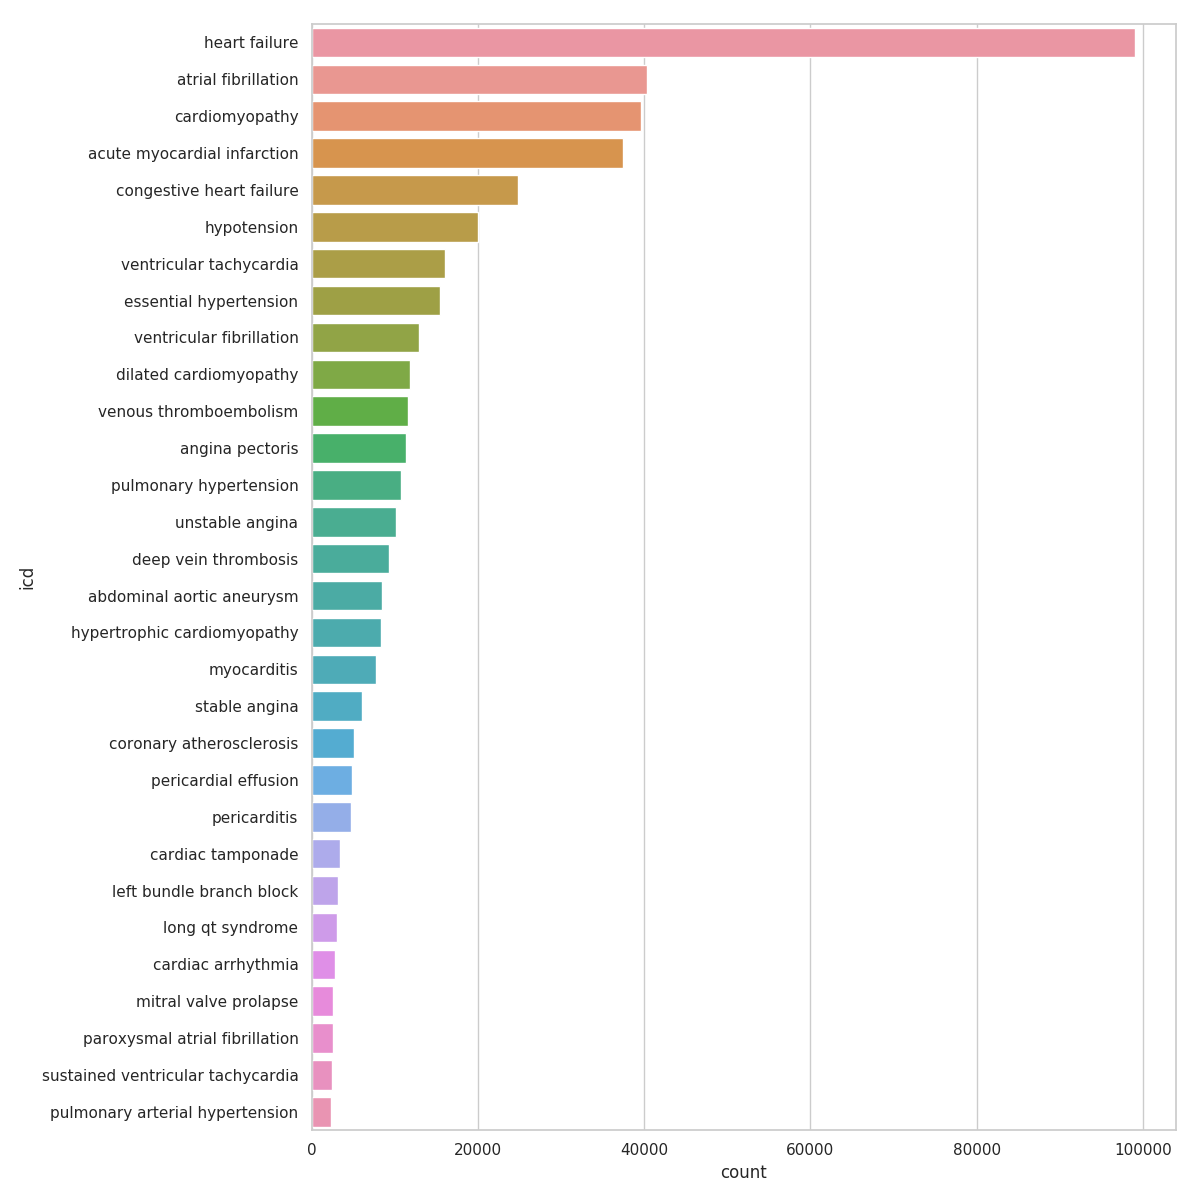

In [100]:
import seaborn as sns
plt.figure(figsize = [12,12])
sns.set(style="whitegrid")
#sns.set(rc={'figure.figsize':(12, 8)})
sns.barplot(x="count", y="icd", data=d2p[0:30])
plt.tight_layout()
plt.savefig("icd-count.png")
plt.show()